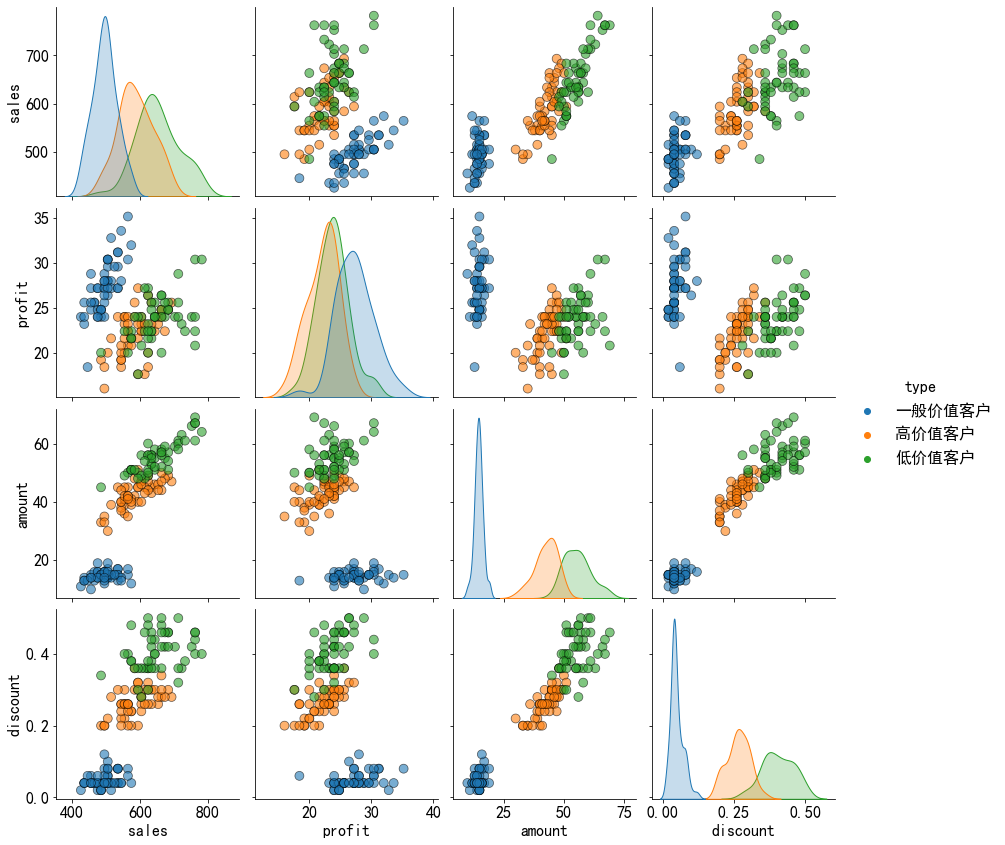

In [5]:
#散点图矩阵
import seaborn as sns
import pandas as pd

iris = pd.read_excel("D:/Python数据可视化分析与案例实战/ch09/经营数据.xls")
sns.pairplot(iris,hue='type',plot_kws={'alpha':0.6,'s':80,'edgecolor':'k'},height=3)

In [2]:
#雷达图
#导入第三方库
import pygal

my_config = pygal.Config()
my_config.show_legend = True
 
#设置字体大小
my_config.style.title_font_size = 26
my_config.style.label_font_size = 16

#设置雷达图的填充及数据范围
radar_chart = pygal.Radar(my_config,fill = False,range=(0,50))

#添加雷达图标题
radar_chart.title = '2020年前三季度各地区客户流失量分析'

#添加雷达图顶点
radar_chart.x_labels = ['华东','华北','华中','华南','西南','西北','东北'] 

#绘制雷达图区域
radar_chart.add('第一季度', [32,21,35,28,39,42,39])
radar_chart.add('第二季度', [30,31,35,25,41,36,34])
radar_chart.add('第三季度', [36,26,30,35,35,46,36])

#保存图像
radar_chart.render_to_file('雷达图.svg')

In [3]:
#导入相关库
import pyecharts.options as opts
from pyecharts.charts import Parallel

#设置坐标系维度
parallel_axis = [
    {"dim": 0,"name": "商品类型","type": "category"},
    {"dim": 1,"name": "东北"},
    {"dim": 2,"name": "华北"},
    {"dim": 3,"name": "华东"},
    {"dim": 4,"name": "西南"},
    {"dim": 5,"name": "中南"},
    {"dim": 6,"name": "西北"},
    {"dim": 8,"name": "业绩评估","type": "category","data": ["较差", "一般","较好","优秀"],
    } ]

#数据设置
data = [["用具",1.68,1.66,0.3,2.62,2.63,2.22,"较差"],
        ["纸张",4.68,5.26,8.3,6.82,9.03,4.62,"一般"],
        ["书架",6.18,7.26,6.3,4.82,8.03,3.32,"一般"],
        ["器具",9.18,9.26,13.3,13.82,14.63,11.62,"较好"],
        ["配件",8.18,8.26,10.3,11.82,13.03,14.52,"较好"],
        ["设备",12.98,18.66,15.83,19.62,15.93,18.82,"优秀"]
       ]

#绘制平行坐标系
def Parallel_splitline() -> Parallel:
    c = (
        Parallel()
        .add_schema(schema=parallel_axis)
        .add(
             series_name="",
             data=data,
             linestyle_opts=opts.LineStyleOpts(width=4, opacity=0.5),
            )
        )
    return c

Parallel_splitline().render('平行坐标系.html')

'D:\\Python数据可视化分析与案例实战\\ch09\\平行坐标系.html'

<ipython-input-4-de211e07aa1a>:36: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(pd.read_csv(datafile,sep="\t",header=None)).astype(np.float)


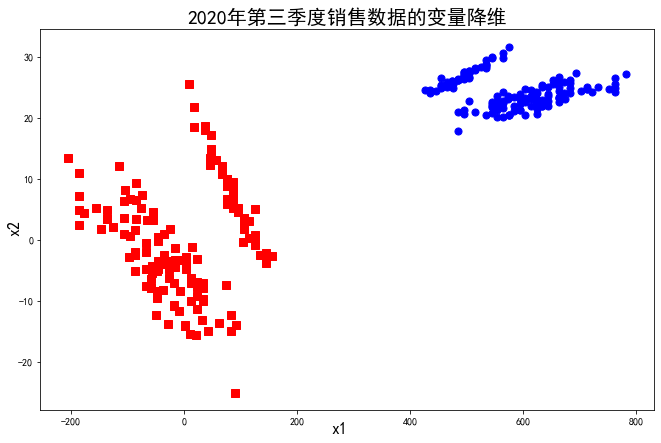

In [4]:
#变量降维
#导入相关库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

#计算均值,要求输入数据为numpy的矩阵格式，行表示样本数，列表示特征    
def meanX(dataX):
    return np.mean(dataX,axis=0)#axis=0表示依照列来求均值。假设输入list,则axis=1

def pca(XMat, k):
    average = meanX(XMat) 
    m, n = np.shape(XMat)
    data_adjust = []
    avgs = np.tile(average, (m, 1))
    data_adjust = XMat - avgs
    covX = np.cov(data_adjust.T)   #计算协方差矩阵
    featValue, featVec=  np.linalg.eig(covX)  #求解协方差矩阵的特征值和特征向量
    index = np.argsort(-featValue) #依照featValue进行从大到小排序
    finalData = []
    if k > n:
        print("k must lower than feature number")
        return
    else:
        #注意特征向量时列向量。而numpy的二维矩阵(数组)a[m][n]中，a[1]表示第1行值
        selectVec = np.matrix(featVec.T[index[:k]]) #所以这里须要进行转置
        finalData = data_adjust * selectVec.T 
        reconData = (finalData * selectVec) + average  
    return finalData, reconData

#输入文件的每行数据都以\t隔开
def loaddata(datafile):
    return np.array(pd.read_csv(datafile,sep="\t",header=None)).astype(np.float)

def plotBestFit(data1, data2):    
    dataArr1 = np.array(data1)
    dataArr2 = np.array(data2)

    m = np.shape(dataArr1)[0]
    axis_x1 = []
    axis_y1 = []
    axis_x2 = []
    axis_y2 = []
    for i in range(m):
        axis_x1.append(dataArr1[i,0])
        axis_y1.append(dataArr1[i,1])
        axis_x2.append(dataArr2[i,0]) 
        axis_y2.append(dataArr2[i,1])                 
    fig = plt.figure(figsize=(11,7))
    ax = fig.add_subplot(111)
    ax.scatter(axis_x1, axis_y1, s=50, c='red', marker='s')
    ax.scatter(axis_x2, axis_y2, s=50, c='blue')
    plt.xlabel('x1',size=15,horizontalalignment='right',verticalalignment='center',fontsize=16)
    plt.ylabel('x2',size=15,rotation=90,horizontalalignment='right',verticalalignment='center',fontsize=16)
    plt.rc('font',size=16)      #设置标签大小
    plt.title('2020年第三季度销售数据的变量降维',fontdict={'fontsize':20})    #设置标题及大小
    plt.savefig("变量降维.png")
    plt.show() 
    
#依据数据集data.txt
def main():    
    datafile = "经营数据.txt"
    XMat = loaddata(datafile)
    k = 2
    return pca(XMat, k)

if __name__ == "__main__":
    finalData, reconMat = main()
    plotBestFit(finalData, reconMat)